In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('dataset_case_boleto.xlsx')

In [ ]:
#Análise exploratória 

In [3]:
df.head()

,mes_ref,company_id,tipo_doc,max_valor_boleto,avg_valor_boleto,valor_boleto_stdv,qtd_boleto_total,total_valor_boleto,qtd_boleto_pago,qtd_boleto_estorno,qnt_cc_total,tempo_credenciamento,conta_bnk_repetida,fraude
0,2020-03-01,5e74d202d1498c5bdf8aafe3,cnpj,6000.0,4884.61,2122.83,13,63500.0,10,0,35,11,0,0
1,2020-03-01,5e78dafeb5ac867c7e85eb5e,cnpj,1800.0,1800.00,0.00,2,3600.0,0,0,0,11,0,0
2,2020-03-01,5e73e21359193c2f123c1076,cnpj,159.9,104.90,77.78,2,209.8,0,0,14,11,0,0
3,2020-04-01,5e7262c49d55ea5dbea59d57,cnpj,600.0,600.00,0.00,3,1800.0,0,0,18,11,0,0
4,2020-04-01,5e610d9f66945c0f82dd357f,cnpj,2941.0,1764.60,657.63,5,8823.0,2,0,65,12,0,0


In [4]:
df.shape

(9277, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9277 entries, 0 to 9276
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   mes_ref               9277 non-null   datetime64[ns]
 1   company_id            9277 non-null   object        
 2   tipo_doc              9277 non-null   object        
 3   max_valor_boleto      9277 non-null   float64       
 4   avg_valor_boleto      9277 non-null   float64       
 5   valor_boleto_stdv     9277 non-null   float64       
 6   qtd_boleto_total      9277 non-null   int64         
 7   total_valor_boleto    9277 non-null   float64       
 8   qtd_boleto_pago       9277 non-null   int64         
 9   qtd_boleto_estorno    9277 non-null   int64         
 10  qnt_cc_total          9277 non-null   int64         
 11  tempo_credenciamento  9277 non-null   int64         
 12  conta_bnk_repetida    9277 non-null   int64         
 13  fraude            

In [6]:
df.describe()

,max_valor_boleto,avg_valor_boleto,valor_boleto_stdv,qtd_boleto_total,total_valor_boleto,qtd_boleto_pago,qtd_boleto_estorno,qnt_cc_total,tempo_credenciamento,conta_bnk_repetida,fraude
count,9.277000e+03,9.277000e+03,9.277000e+03,9277.000000,9.277000e+03,9277.000000,9277.000000,9277.000000,9277.000000,9277.000000,9277.000000
mean,1.364116e+04,6.102405e+03,4.973007e+03,11.086774,2.772717e+04,4.499623,0.157917,6.037728,6.331034,0.107255,0.171823
std,3.073980e+05,1.390150e+05,1.921443e+05,40.794549,3.235246e+05,22.885944,0.876460,18.828619,4.468837,0.309453,0.377247
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.600000e+02,1.315000e+02,0.000000e+00,1.000000,2.682000e+02,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,5.202000e+02,3.388800e+02,3.809000e+01,3.000000,1.489000e+03,1.000000,0.000000,0.000000,8.000000,0.000000,0.000000
75%,4.463680e+03,2.123420e+03,4.618800e+02,7.000000,1.068454e+04,2.000000,0.000000,4.000000,11.000000,0.000000,0.000000
max,2.147484e+07,1.123742e+07,1.447790e+07,1103.000000,2.247484e+07,685.000000,25.000000,528.000000,14.000000,1.000000,1.000000


Número de transações válidas: 7683
Equivale a 82.82% do total de transações
                                          
Número de transações fraudulentas: 1594
Equivale a 17.18% do total de transações



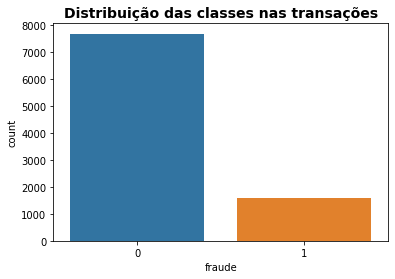

In [7]:
print('Número de transações válidas: {}'.format(len(df[df['fraude'] == 0])))
print(f'Equivale a {round(df.fraude.value_counts(normalize=True)[0]*100, 2)}% do total de transações')
print('   ' * 14)
print('Número de transações fraudulentas: {}'.format(len(df[df['fraude'] == 1])))
print(f'Equivale a {round(df.fraude.value_counts(normalize=True)[1]*100, 2)}% do total de transações\n')

plt.figure(figsize=(6,4))

sns.countplot(df.fraude)

plt.title('Distribuição das classes nas transações', fontweight='bold', fontsize=14)

plt.show()

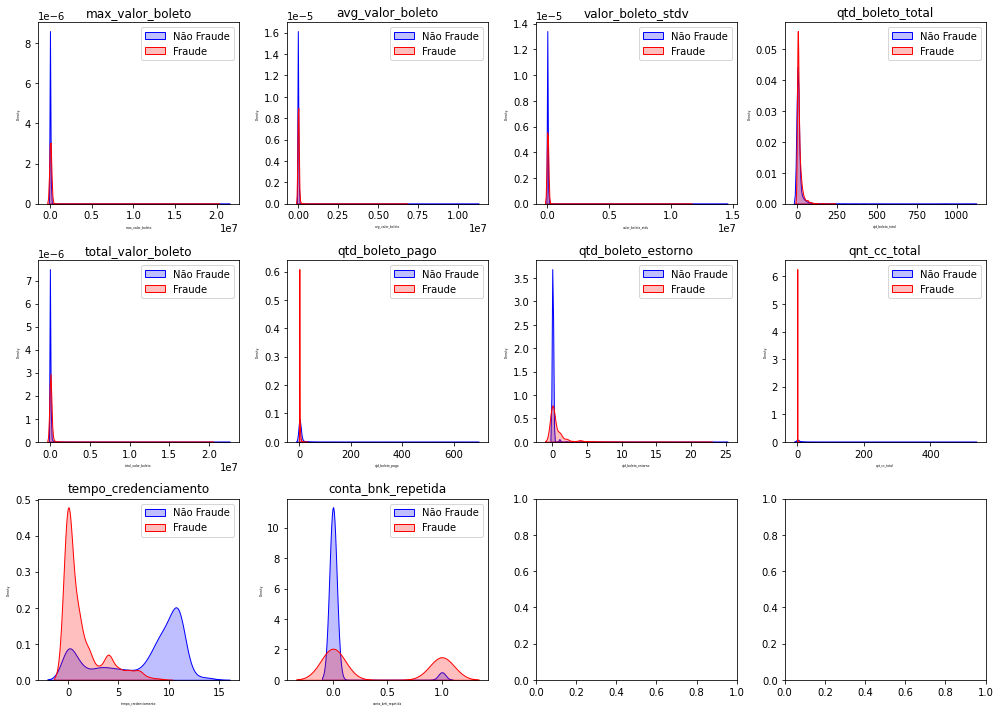

In [10]:
num_plots = len(df.iloc[:,3:13].values)

df_class_0 = df[df.fraude == 0]
df_class_1 = df[df.fraude == 1]

nrow = 3
ncol = 4
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(14,10))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in df.iloc[:,3:13]:
    plt.rcParams["axes.labelsize"] = 3
    idx += 1
    plt.subplot(nrow, ncol, idx)
    sns.kdeplot(df_class_0[col], label="Não Fraude", shade=True, color='blue')
    sns.kdeplot(df_class_1[col], label="Fraude", shade=True, color='red')
    plt.title(col, fontsize=12)
    plt.legend(fontsize=10)
plt.tight_layout()

In [11]:
df.groupby('tipo_doc')['fraude'].sum()

tipo_doc
cnpj      95
cpf     1499
Name: fraude, dtype: int64

In [12]:
df['mes_ref'].value_counts()

2021-02-01    1423
2021-01-01    1027
2020-12-01     817
2020-11-01     792
2020-07-01     771
2020-06-01     739
2020-08-01     680
2020-09-01     679
2020-05-01     649
2020-10-01     638
2021-03-01     443
2020-04-01     420
2020-03-01     174
2020-02-01      17
2020-01-01       8
Name: mes_ref, dtype: int64

In [13]:
df.groupby('mes_ref')['fraude'].sum()

mes_ref
2020-01-01      0
2020-02-01      0
2020-03-01      0
2020-04-01      1
2020-05-01      2
2020-06-01      8
2020-07-01     30
2020-08-01     42
2020-09-01     82
2020-10-01     50
2020-11-01    103
2020-12-01    286
2021-01-01    570
2021-02-01    402
2021-03-01     18
Name: fraude, dtype: int64

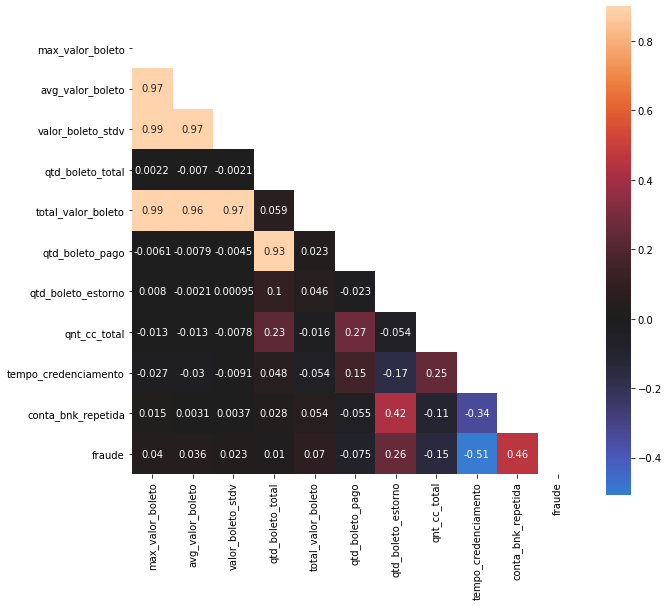

In [14]:
correlation = df.corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 9))
plot = sns.heatmap(correlation, mask = mask, vmax=.9, center = 0, annot = True, square = True)

In [15]:
df.corr()['fraude'].sort_values(ascending=False)

fraude                  1.000000
conta_bnk_repetida      0.460841
qtd_boleto_estorno      0.257995
total_valor_boleto      0.069590
max_valor_boleto        0.039766
avg_valor_boleto        0.036226
valor_boleto_stdv       0.022757
qtd_boleto_total        0.010204
qtd_boleto_pago        -0.074525
qnt_cc_total           -0.145553
tempo_credenciamento   -0.509316
Name: fraude, dtype: float64

In [ ]:
# Modelo Machine Learning de classificação
# Objetivo: de detectar fraudes de boletos

In [16]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [17]:
df_train.fraude.value_counts(normalize=True)

0    0.824552
1    0.175448
Name: fraude, dtype: float64

In [18]:
df_test.fraude.value_counts(normalize=True)

0    0.842672
1    0.157328
Name: fraude, dtype: float64

In [19]:
X = df_train.iloc[:,7:13]
y = df_train.iloc[:,13]

StratifKfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in StratifKfold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

In [23]:
print(f'Dimensões: {X_train.shape, X_val.shape, y_train.shape, y_val.shape}\n')
print(f"Proporção do df_train para fraude = 1: {round(len(df_train[df_train.fraude==1]) / df_train.shape[0], 4)}")
print(f"Proporção de X_train para fraude = 1:  {round(len(y_train[y_train==1]) / X_train.shape[0], 4)}")
print(f"Proporção de X_val para fraude = 1:    {round(len(y_val[y_val==1]) / X_val.shape[0], 4)}")

Dimensões: ((5937, 6), (1484, 6), (5937,), (1484,))

Proporção do df_train para fraude = 1: 0.1754
Proporção de X_train para fraude = 1:  0.1753
Proporção de X_val para fraude = 1:    0.1759


In [26]:
logReg = LogisticRegression()

logReg.fit(X_train, y_train)

y_pred_base_train = logReg.predict(X_train)

y_pred_base_val = logReg.predict(X_val)

print('Dados de TREINO:')
print('---' * 14)
print('Modelo:    Regressão Logística')
print(f"accuracy:  {accuracy_score(y_train, y_pred_base_train)}")
print(f"precision: {precision_score(y_train, y_pred_base_train)}")
print(f"recall:    {recall_score(y_train, y_pred_base_train)}")
print(f"f1:        {f1_score(y_train, y_pred_base_train)}")
print()
print('---' * 14)
print('---' * 14)
print()
print('Dados de VALIDAÇÃO:')
print('---' * 14)
print('Modelo:    Regressão Logística')
print(f"accuracy:  {accuracy_score(y_val, y_pred_base_val)}")
print(f"precision: {precision_score(y_val, y_pred_base_val)}")
print(f"recall:    {recall_score(y_val, y_pred_base_val)}")
print(f"f1:        {f1_score(y_val, y_pred_base_val)}")

Dados de TREINO:
------------------------------------------
Modelo:    Regressão Logística
accuracy:  0.8500926393801583
precision: 0.5878928987194412
recall:    0.4851104707012488
f1:        0.531578947368421

------------------------------------------
------------------------------------------

Nos dados de VALIDAÇÃO:
------------------------------------------
Modelo:    Regressão Logística
accuracy:  0.8470350404312669
precision: 0.5801886792452831
recall:    0.47126436781609193
f1:        0.5200845665961945


In [ ]:
# Métodos de reamostragem
# Objtivo: modificar a estrutura dos dados de treino para um modelo de classificação com classe desbalanceada.

In [27]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(), 
    "Random Forest": RandomForestClassifier()
}

In [28]:
undersample = NearMiss()

X_under, y_under = undersample.fit_resample(X_train, y_train)

counter = Counter(y_under)
print(counter)

Counter({0: 1041, 1: 1041})


In [29]:
for nome, model in classifiers.items():
    
    model.fit(X_under, y_under)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 14)
    print('---' * 14)

Modelo:    LogisiticRegression

accuracy:  0.8645552560646901
precision: 0.5735294117647058
recall:    0.896551724137931
f1:        0.6995515695067264
------------------------------------------
------------------------------------------
Modelo:    KNearest

accuracy:  0.6212938005390836
precision: 0.30479896238651105
recall:    0.9003831417624522
f1:        0.4554263565891474
------------------------------------------
------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.805256064690027
precision: 0.4723320158102767
recall:    0.9157088122605364
f1:        0.6232073011734028
------------------------------------------
------------------------------------------
Modelo:    Random Forest

accuracy:  0.8477088948787062
precision: 0.5395033860045146
recall:    0.9157088122605364
f1:        0.6789772727272727
------------------------------------------
------------------------------------------


In [30]:
oversample = RandomOverSampler(sampling_strategy='minority')

X_over, y_over = oversample.fit_resample(X_train, y_train)

counter = Counter(y_over)
print(counter)

Counter({0: 4896, 1: 4896})


In [32]:
for nome, model in classifiers.items():
    
    model.fit(X_over, y_over)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 14)
    print('---' * 14)

Modelo:    LogisiticRegression

accuracy:  0.8012129380053908
precision: 0.4669260700389105
recall:    0.9195402298850575
f1:        0.6193548387096774
------------------------------------------
------------------------------------------
Modelo:    KNearest

accuracy:  0.7985175202156334
precision: 0.4579646017699115
recall:    0.7931034482758621
f1:        0.5806451612903225
------------------------------------------
------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.8793800539083558
precision: 0.6722689075630253
recall:    0.6130268199233716
f1:        0.6412825651302604
------------------------------------------
------------------------------------------
Modelo:    Random Forest

accuracy:  0.883423180592992
precision: 0.680327868852459
recall:    0.6360153256704981
f1:        0.6574257425742575
------------------------------------------
------------------------------------------


In [33]:
oversample_smote = SMOTE(sampling_strategy='minority')

X_smote, y_smote = oversample_smote.fit_resample(X_train, y_train)

counter = Counter(y_smote)
print(counter)

Counter({0: 4896, 1: 4896})


In [34]:
for nome, model in classifiers.items():
    
    model.fit(X_smote, y_smote)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 14)
    print('---' * 14)

Modelo:    LogisiticRegression

accuracy:  0.7998652291105122
precision: 0.4642857142857143
recall:    0.896551724137931
f1:        0.611764705882353
------------------------------------------
------------------------------------------
Modelo:    KNearest

accuracy:  0.8018867924528302
precision: 0.46292134831460674
recall:    0.789272030651341
f1:        0.5835694050991502
------------------------------------------
------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.878032345013477
precision: 0.6265822784810127
recall:    0.7586206896551724
f1:        0.6863084922010398
------------------------------------------
------------------------------------------
Modelo:    Random Forest

accuracy:  0.8679245283018868
precision: 0.5931232091690545
recall:    0.7931034482758621
f1:        0.678688524590164
------------------------------------------
------------------------------------------


In [ ]:
#Modelo ajustado e validação cruzada

In [35]:
X_train_array = X_train.values
X_val_array = X_val.values
y_train_array = y_train.values
y_val_array = y_val.values

In [36]:
n_estimators = [3,5,10,100]

max_features = [3,4,5,6,None]

max_depth = [3,4,5,6,None]

class_weight = ['balanced',None]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'class_weight': class_weight}

pprint(random_grid)

{'class_weight': ['balanced', None],
 'max_depth': [3, 4, 5, 6, None],
 'max_features': [3, 4, 5, 6, None],
 'n_estimators': [3, 5, 10, 100]}


In [37]:
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

rf_grid = RandomizedSearchCV(RandomForestClassifier(), random_grid, random_state=42)

count = 0

for train, test in StratifKfold.split(X_train_array, y_train_array):
    
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rf_grid)
    
    model = pipeline.fit(X_train_array[train], y_train_array[train])
    
    best_est = rf_grid.best_estimator_
    
    prediction = best_est.predict(X_train_array[test])
    
    accuracy_lst.append(pipeline.score(X_train_array[test], y_train_array[test]))
    precision_lst.append(precision_score(y_train_array[test], prediction))
    recall_lst.append(recall_score(y_train_array[test], prediction))
    f1_lst.append(f1_score(y_train_array[test], prediction))
    auc_lst.append(roc_auc_score(y_train_array[test], prediction))
    
    count = count + 1


print('---' * 14)
print(f"melhores estimadores para RF: {rf_grid.best_params_}")

print('---' * 14)
print('Resultados')
print(f"accuracy:  {np.mean(accuracy_lst)}")
print(f"precision: {np.mean(precision_lst)}")
print(f"recall:    {np.mean(recall_lst)}")
print(f"f1:        {np.mean(f1_lst)}")
print('---' * 14)


------------------------------------------
melhores estimadores para RF: {'n_estimators': 10, 'max_features': 5, 'max_depth': 6, 'class_weight': None}
------------------------------------------
Resultados
accuracy:  0.903990338657567
precision: 0.681687924846036
recall:    0.8482057416267942
f1:        0.7549567461456839
------------------------------------------


In [ ]:
#Modelo final e matriz de confusão

In [38]:
X_all = df_train.iloc[:,7:13]
y_all = df_train.iloc[:,13]

final_model = rf_grid.best_estimator_

pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), final_model)

model = pipeline.fit(X_all, y_all)

In [39]:
X_test = df_test.iloc[:,7:13]
y_test = df_test.iloc[:,13]

y_pred_test = model.predict(X_test)

print(f"accuracy:  {accuracy_score(y_test, y_pred_test)}")
print(f"precision: {precision_score(y_test, y_pred_test)}")
print(f"recall:    {recall_score(y_test, y_pred_test)}")
print(f"f1:        {f1_score(y_test, y_pred_test)}")

accuracy:  0.90625
precision: 0.6391509433962265
recall:    0.928082191780822
f1:        0.7569832402234636


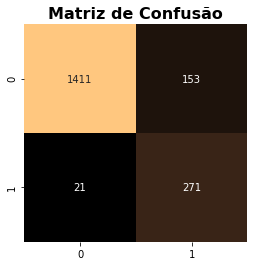

In [40]:
plt.figure(figsize=(4,4))

sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap=plt.cm.copper, fmt='g', cbar=False)
plt.title("Matriz de Confusão", fontsize=16, fontweight='bold')
plt.show()
